In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_9487bd2751234956b330742a185794d9.csv"
df=pd.read_csv(url)
df.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,...,Attribute_77,Attribute_78,Attribute_79,Attribute_80,Attribute_81,Attribute_82,Attribute_83,Attribute_84,Attribute_85,Target
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df.shape

(5822, 86)

In [5]:
X=df.drop(["Target"],axis=1)
y=df[["Target"]]

In [6]:
scaler=preprocessing.StandardScaler()
names=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=names)
X.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,...,Attribute_76,Attribute_77,Attribute_78,Attribute_79,Attribute_80,Attribute_81,Attribute_82,Attribute_83,Attribute_84,Attribute_85
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [7]:
n_samples=y.shape[0]
n_samples

5822

In [8]:
y=np.asarray(y).reshape(n_samples,)
y

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
estimator=RandomForestClassifier(n_estimators=300,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(8),scoring="accuracy")
features.fit(X, y)
print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 1


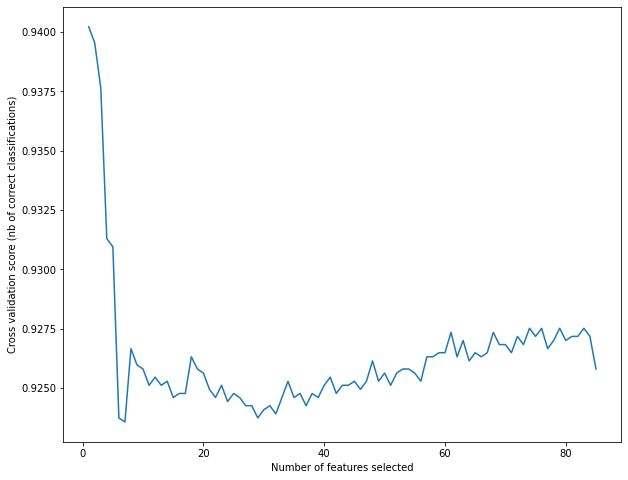

In [16]:
plt.figure(figsize=(10,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [17]:
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})
selector

,Importance
0,1
1,61
2,52
3,44
4,23
...,...
80,79
81,53
82,45
83,72


In [18]:
features=selector[selector["Importance"]==1]
features

,Importance
0,1


In [19]:
X=X.iloc[:,features.index]
X.head()

,Attribute_1
0,0.680906
1,0.992297
2,0.992297
3,-1.187437
4,1.225840


In [20]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 300, cv = 8, verbose=2, n_jobs = -1)

In [22]:
rf_random.fit(X,y)

Fitting 8 folds for each of 300 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 43.3min finished


RandomizedSearchCV(cv=8,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                 

In [23]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [24]:
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X)
print("Accuracy on train data: ",accuracy_score(y,y_pred))

Accuracy on train data:  0.6739951906561319
